# Linear Regression

## Simple linear regression

### Dataset description and visualisation

<b>Student Hours & Scores: </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

<div class="alert alert-block alert-danger"> 

1. Import the student hours and scores dataset.
2. Is this task a multiple or a simple linear regression problem?
3. Which variable represents the dependent variable, and which one represents the independent variable?
4. Display the number of samples and features in the dataset.
5. Display the information about the dataset features.
6. Describe the features by displaying their statistics.
7. Plot the data and observe whether it demonstrates linear separability.
<div/>

In [1]:
#import student dataset
import pandas as pd

data = pd.read_csv('student_scores.csv')
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Since we’re predicting the score based solely on study hours (one feature), this is a simple linear regression problem.

Dependent variable (target/output): Score (percentage of marks scored)

Independent variable (predictor/input): Hours (number of hours studied)

In [2]:
# Display the number of samples and features
# Get the shape of the dataset
num_samples, num_features = data.shape
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")


Number of samples: 25
Number of features: 2


In [3]:
# Display information about the dataset features
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [4]:
# Describe the features by displaying their statistics
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


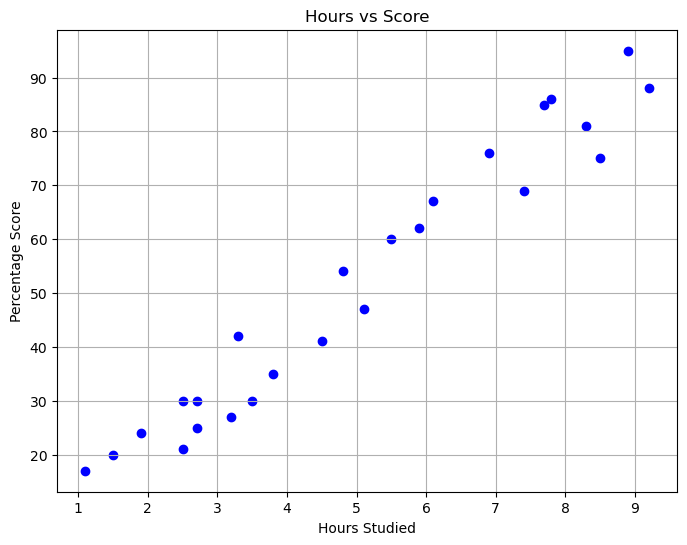

In [6]:
#Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['Hours'], data['Scores'], color='blue')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()

### Dataset training and evaluation

<div class="alert alert-block alert-danger">  
    
1. Split the dataset into training and testing sets.
2. Train the data using the LinearRegression module from sklearn. 
3. Display the model's equation.
4. Create a plot showing the data and the generated model.
5. Display the performance of the generated model on the training and the test set, based on the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Does the generated model present an overfitting problem?
6. Describe the R-squared metric and its advantages compared to the other metrics.
7. Is the generated model characterized by good performance?
8. Create a plot visualizing the difference between actual and predicted values.
<div/>

In [2]:
#split the data set into training and testing sets
from sklearn.model_selection import train_test_split

X = data[['Hours']]
y = data['Scores']

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
""" 
i used random_state  as a seed value for the 
random number generator that controlls the shuffling
to generate the same split sets after 
each time i rerun the code and avoid random shuffling
"""
print(f"x_train set : {X_train}")
print(f"x_test set : {X_test}")
print(f"y_train set : {y_train}")
print(f"y_test set : {y_test}")

x_train set :     Hours
13    3.3
0     2.5
6     9.2
16    2.5
11    5.9
20    2.7
14    1.1
23    6.9
19    7.4
3     8.5
7     5.5
1     5.1
5     1.5
24    7.8
8     8.3
18    6.1
12    4.5
22    3.8
15    8.9
4     3.5
x_test set :     Hours
2     3.2
9     2.7
17    1.9
10    7.7
21    4.8
y_train set : 13    42
0     21
6     88
16    30
11    62
20    30
14    17
23    76
19    69
3     75
7     60
1     47
5     20
24    86
8     81
18    67
12    41
22    35
15    95
4     30
Name: Scores, dtype: int64
y_test set : 2     27
9     25
17    24
10    85
21    54
Name: Scores, dtype: int64


In [3]:
# Train the data using the LinearRegression module from sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Display the model's equation
slope = model.coef_[0]
intercept = model.intercept_

print(f"Model equation: Score = {slope:.2f} * Hours + {intercept:.2f}")


Model equation: Score = 9.54 * Hours + 3.51


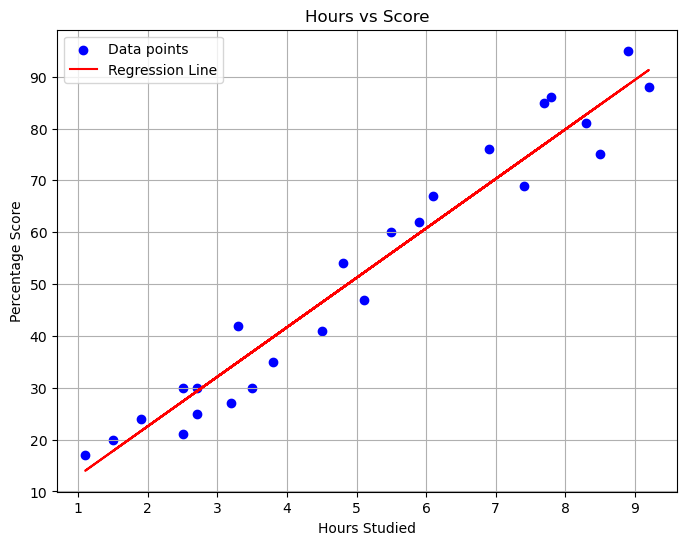

In [ ]:
#Create a plot showing the data and the generated model
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
#Display the model’s performance using evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Training Set Performance:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R-squared: {r2_train:.2f}\n")

print("Testing Set Performance:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R-squared: {r2_test:.2f}")


Training Set Performance:
MAE: 4.84
MSE: 28.56
RMSE: 5.34
R-squared: 0.95

Testing Set Performance:
MAE: 5.28
MSE: 31.95
RMSE: 5.65
R-squared: 0.94


R-squared (Coefficient of Determination) measures the proportion of the variance in the dependent variable explained by the independent variable(s).


Advantages of R-squared:
Ranges from 0 to 1, where 1 indicates a perfect fit.
It provides a normalized measure, making it easier to interpret and compare models.

Unlike MAE, MSE, and RMSE, R-squared shows the explanatory power of the model rather than the magnitude of errors

 Assessing Model Performance
 
A good R-squared score close to 1 and lower values for MAE, MSE, and RMSE generally indicate a well-performing model. If the training and testing errors are similar and low, it suggests the model generalizes well without overfitting.

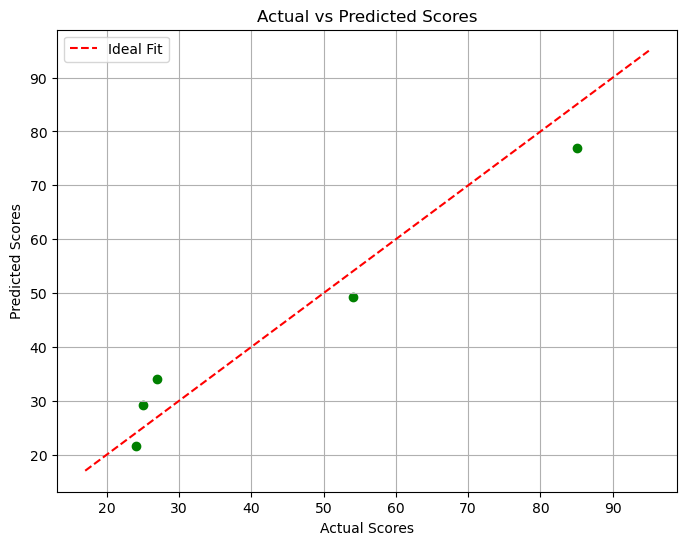

In [10]:
#Plot the difference between actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()


## Multiple linear regression

### Data description and analysis

<b> The Boston Housing Dataset: </b> the Boston Housing Dataset is derived from information collected by the U.S. Census Service regarding housing in the Boston, Massachusetts area. It aims to predict house prices based on various characteristics. 

<div class="alert alert-block alert-danger">
    
1. Import the Boston Housing dataset.
2. Display the correlation matrix and select only the highly correlated features with the label (MEDV feature) using a threshold value of 0.6.
3. Verify if the selected features represent a linear relationship with the target variable based on a 3D plot.
4. Split the generated dataset.
5. Normalize the data (excluding the label) using the min max scaler strategy.


<div/>

In [1]:

#! Import the Boston Housing Dataset
import pandas as pd

file_path = 'HousingData.csv'
data = pd.read_csv(file_path)
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:

#! Display the Correlation Matrix and Select Highly Correlated Features
import numpy as np

correlation_matrix = data.corr()
display(correlation_matrix)
threshold = 0.6
high_corr_features = correlation_matrix[(abs(
    correlation_matrix['MEDV']) > threshold ) & (
        abs(correlation_matrix['MEDV']) != 1)]['MEDV'].index.tolist()


print("Highly correlated features with MEDV:", high_corr_features)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


Highly correlated features with MEDV: ['RM', 'LSTAT']


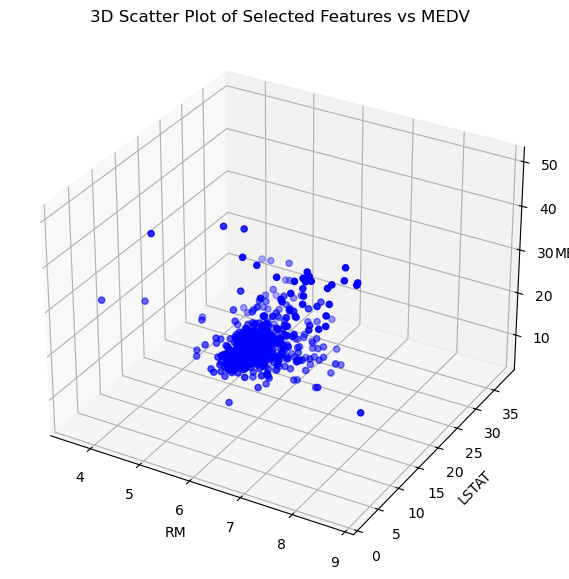

In [5]:

#! Verify Linear Relationship with 3D Plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

feature1 = 'RM'
feature2 = 'LSTAT'
target = 'MEDV'

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[feature1], data[feature2], data[target], c='b', marker='o')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(target)
ax.set_title('3D Scatter Plot of Selected Features vs MEDV')
plt.show()


In [ ]:

#! Split the Dataset
from sklearn.model_selection import train_test_split

X = data[high_corr_features]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

Training set shape: (404, 2), Testing set shape: (102, 2)


In [30]:

#! Normalize the Data using Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

scaler = MinMaxScaler()


X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=high_corr_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=high_corr_features)
imputer = SimpleImputer(strategy='mean')


if X_train_scaled.isnull().values.any():
    X_train_scaled = pd.DataFrame(imputer.fit_transform(
        X_train_scaled), columns=high_corr_features)

if X_test_scaled.isnull().values.any():
    X_test_scaled = pd.DataFrame(imputer.transform(
        X_test_scaled), columns=high_corr_features)

if pd.isnull(y_train).any():
    y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

X_train_scaled_df.head()


,RM,LSTAT
0,0.293065,0.639625
1,0.400854,0.185982
2,0.440919,0.168322
3,0.455562,0.594923
4,0.379093,0.263521


### Data training and evaluation

<div class="alert alert-block alert-danger">
    
1. Use the following lines of code to perform training on the Boston Housing dataset.

<div/>

<div class="alert alert-block alert-danger">

2. Display the convergence graph of the trained model (where x represents the iterations and y is the loss).
3. Vary the learning rate value (0.01, 0.001, 0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?
4. Why does the graph not reach the maximum number of iterations when
using the 0.01 learning rate? Which variable controls this behavior?
5. Display the performance of the generated models on the test set based on the following metrics: MAE, MSE, RMSE, and R-squared. Select the best model based on these metrics.
6. Plot the generated plane of the best model and the scaled training data in one 3D plot. What do you observe?
7. Predict the class of the sample shown in the following figure based on the best model.    

<div/>

-- Epoch 1
Norm: 1.48, NNZs: 2, Bias: 2.505896, T: 404, Avg. loss: 260.905503
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.37, NNZs: 2, Bias: 4.013055, T: 404, Avg. loss: 211.899884
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.08, NNZs: 2, Bias: 5.205410, T: 404, Avg. loss: 180.238679
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.68, NNZs: 2, Bias: 6.203980, T: 404, Avg. loss: 156.768142
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4.20, NNZs: 2, Bias: 7.064299, T: 404, Avg. loss: 138.489376
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4.65, NNZs: 2, Bias: 7.818733, T: 404, Avg. loss: 123.845771
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5.05, NNZs: 2, Bias: 8.488551, T: 404, Avg. loss: 111.886611
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5.42, NNZs: 2, Bias: 9.087639, T: 404, Avg. loss: 101.984443
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5.74, NNZs: 2, Bias: 9.628461, T: 404, Avg. loss: 93.697786
Total training time

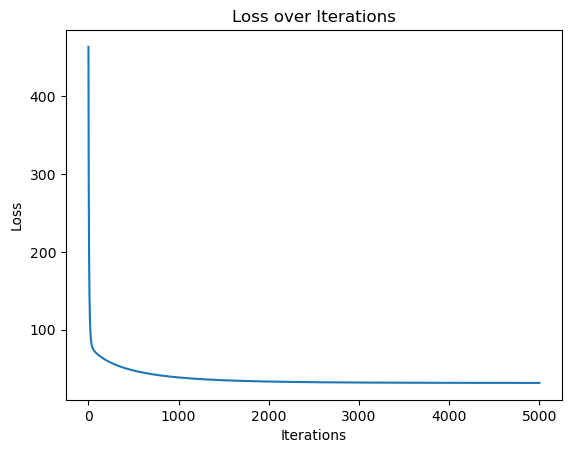

In [33]:

# ! trainning
sgdr = SGDRegressor(learning_rate='invscaling',
                    eta0=0.001, max_iter=5000, verbose=1)

losses = []
for i in range(5000):
    sgdr.partial_fit(X_train_scaled, y_train)
    y_train_pred = sgdr.predict(X_train_scaled)
    loss = mean_squared_error(y_train, y_train_pred)
    losses.append(loss)

plt.plot(range(1, len(losses) + 1), losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

![title](sample.png)